# Modules


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets

sns.set()


In [2]:
def ecdf(data):
    """
    returns X and Y arrays 
    for the ECDF of a 1D array of measurements.
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n   # 1/n to 1 in equally spaced increments
    
    return x, y


___

# Approximating a Distribution
## Normal Distribution Example - Belmont Stakes

The data has been scraped from the [Belmont Wikipedia page](https://en.wikipedia.org/wiki/Belmont_Stakes).
+ Secretariat ran the fastest Belmont Stakes in history in 1973. 
+ While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. 

We remove these two outliers from the data set to compute the mean and standard deviation of the Belmont winners' times. The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.


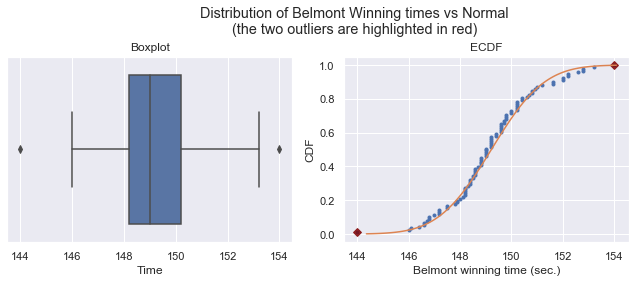

In [7]:
# load df
belmont_df = pd.read_csv('../../data/belmont_stakes.csv')
belmont_no_outliers = belmont_df.loc[belmont_df['IsOutlier'] == 0, 'Time']
belmont_outliers = belmont_df.loc[belmont_df['IsOutlier'] == 1, 'Time'].sort_values()

# ecdf
x, y = ecdf(belmont_df['Time'])

# Compute mean and standard deviation without the outliers: mu, sigma
mu = belmont_no_outliers.mean()
sigma = belmont_no_outliers.std()
x_theor = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y_theor = stats.norm.cdf(x_theor, mu, sigma)

# Plot the CDFs and show the plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

_ = sns.boxplot(x=belmont_df['Time'], ax=ax1)
_ = ax2.plot(x, y, marker='.', linestyle='none')
_ = ax2.plot(belmont_outliers, y[[0, -1]], marker='D', color='maroon', linestyle='none', alpha=0.8)
_ = ax2.plot(x_theor, y_theor)

# labels
_ = ax2.set_xlabel('Belmont winning time (sec.)')
_ = ax2.set_ylabel('CDF')

# titles
_ = ax1.set_title('Boxplot')
_ = ax2.set_title('ECDF')

fig.suptitle('Distribution of Belmont Winning times vs Normal\n(the two outliers are highlighted in red)')

plt.tight_layout(rect=[0, 0, 0.9, 0.9])


If we assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat is very small: 0.06%.

_Note: the probability is so low that we need to take a million samples to be sure we get this value from the normal distribution at least once, when using hackers statistics._


In [8]:
secretariat = belmont_df.loc[belmont_df['Winner'] == 'Secretariat', 'Time'].values[0]
prob = stats.norm(mu, sigma).cdf(144)

# alternative: hacker statistics
# sample = np.random.normal(loc=mu, scale=sigma, size=1000000)
# prob = np.sum(sample <= secretariat) / 1000000

print('Probability of besting Secretariat: {:.2%}'.format(prob))


Probability of besting Secretariat: 0.06%


## Binomial Distribution Example

A bank made 100 mortgage loans. What is the probabilit of losing money (more than 10% defaults), if the probability of a default is 5%?

We make the assumption that the number of defaults follows a Binomial distribution.


In [18]:
# probability of having exactly 9 defaults (built-in vs manual formula)
print('Proba of having exactly nine defaults, given by the PMF:    {:.5}'.format(stats.binom.pmf(9, 100, 0.05)))
print('Proba of having exactly nine defaults, calculated manually: {:.5}'.format(np.math.factorial(100) / (np.math.factorial(9) * np.math.factorial(100 - 9)) * np.power(0.05, 9) * np.power(1 - 0.05, 100-9)))


Proba of having exactly nine defaults, given by the PMF:    0.034901
Proba of having exactly nine defaults, calculated manually: 0.034901


In [19]:
# Probabilit of losing money (more than 10% defaults)
# p(default >= 10) = 1 - p(defaults <= 9)
print('Probability of losing money = {:.1%}'.format(1 - stats.binom.cdf(9, 100, 0.05)))


Probability of losing money = 2.8%


## Poisson Distribution Example

The number of daily customers of a shop fell from 115 last week to 99 this week. Is this reported change really noteworthy?

We make the assumption that the number of daily customers follows a Poisson distribution:
+ the daily average is constant.
+ the arrival of one customer is independent of the time since the last customer. 

We can check the probability of observing a value at least as extreme as 99 for a Poisson distribution where $\lambda$ is the known daily customer average 115.


Probability of seeing 99 customers per day or less: 7.2%


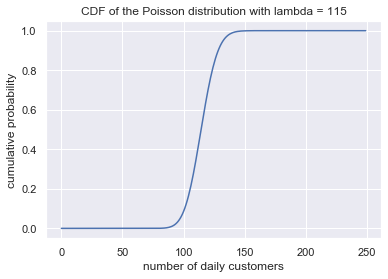

In [11]:
# CDF
_ = plt.plot(range(0, 250), stats.poisson.cdf(range(0, 250), 115))
plt.title('CDF of the Poisson distribution with lambda = 115')
plt.xlabel('number of daily customers')
plt.ylabel('cumulative probability')

# probability of having a number at least at extreme as 99
print('Probability of seeing 99 customers per day or less: {:.1%}'.format(stats.poisson.cdf(99, 115)))
